In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-not-pizza/pizza_not_pizza/food101_subset.py
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/2374305.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/2415437.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/1123352.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/2294128.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/215349.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/938244.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/444123.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/884964.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/2394770.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/901984.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/117282.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/1227349.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/1743531.jpg
/kaggle/input/pizza-not-pizza/pizza_not_pizza/not_pizza/21

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,Dense, Flatten, GlobalAveragePooling2D


In [3]:
from tensorflow.keras.models import Sequential
import cv2
import pathlib

In [4]:
path="../input/pizza-not-pizza/pizza_not_pizza"
data_dir=pathlib.Path(path)

In [5]:
import random
import glob

In [6]:
image=glob.glob("../input/pizza-not-pizza/pizza_not_pizza/*/*.jpg")
image=pd.Series(image)
print("No of images :",len(image))

No of images : 1966


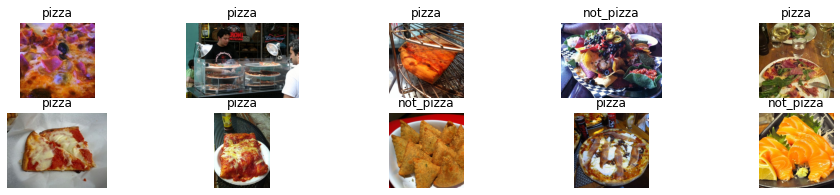

In [7]:
classes=os.listdir(path)

plt.figure(figsize=(16,8))

for x in range(10):
    i=random.randint(0,1)
    images=os.listdir(path+'/'+classes[i])
    j=random.randint(0,900)
    image=cv2.imread(path+'/'+classes[i]+'/'+images[j])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax=plt.subplot(5,5,x+1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")
    
    
plt.show()

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_ds=train_data.flow_from_directory(
    path,
    subset='training',
    target_size=(224,224),
    batch_size=32
    
)
test_ds=train_data.flow_from_directory(
    path,
    subset='validation',
    target_size=(224,224),
    batch_size=32
)

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications import MobileNet

In [11]:
mobilenet=MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

2022-07-20 13:26:01.349612: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


17235968/17225924 [==============================] - 0s 0us/step


In [12]:
for layers in mobilenet.layers:
    layers.trainable=False

In [13]:
from tensorflow import keras
from keras.layers import Dropout

In [14]:
model=Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax',name='classification'))

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
classification (Dense)       (None, 2)                 1026      
Total params: 4,804,290
Trainable params: 1,575,426
Non-trainable params: 3,228,864
______________________________________

In [16]:
history=model.fit(train_ds,validation_data=test_ds,epochs=20)

2022-07-20 13:26:03.488260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
50/50 [==============================] - 38s 720ms/step - loss: 0.3497 - accuracy: 0.8399 - val_loss: 0.1858 - val_accuracy: 0.9235
Epoch 2/20
50/50 [==============================] - 32s 647ms/step - loss: 0.1663 - accuracy: 0.9396 - val_loss: 0.1608 - val_accuracy: 0.9311
Epoch 3/20
50/50 [==============================] - 32s 641ms/step - loss: 0.1320 - accuracy: 0.9530 - val_loss: 0.1363 - val_accuracy: 0.9490
Epoch 4/20
50/50 [==============================] - 32s 631ms/step - loss: 0.1087 - accuracy: 0.9593 - val_loss: 0.1287 - val_accuracy: 0.9490
Epoch 5/20
50/50 [==============================] - 32s 633ms/step - loss: 0.0962 - accuracy: 0.9657 - val_loss: 0.1425 - val_accuracy: 0.9337
Epoch 6/20
50/50 [==============================] - 33s 649ms/step - loss: 0.0808 - accuracy: 0.9708 - val_loss: 0.1186 - val_accuracy: 0.9464
Epoch 7/20
50/50 [==============================] - 32s 647ms/step - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.1193 - val_accuracy: 0.9515

In [17]:
model.evaluate(test_ds)

13/13 [==============================] - 6s 456ms/step - loss: 0.1132 - accuracy: 0.9515


[0.11315056681632996, 0.9515306353569031]

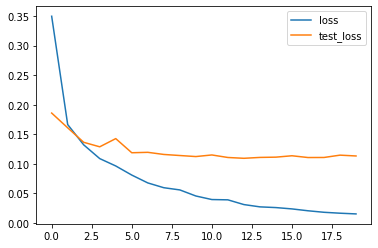

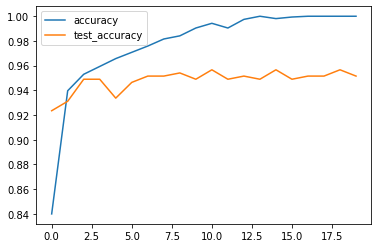

In [18]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','test_loss'],loc='upper right')
plt.show()


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','test_accuracy'])

plt.show()
